<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/02-linear-regression/LinearRegression_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alexandra Serechenko

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1 (3 points)

Consider the following toy dataset:

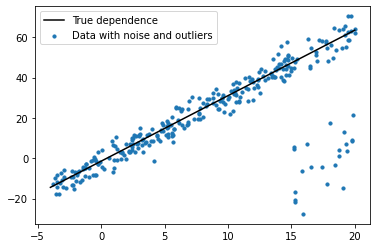

In [12]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [126]:
#introduce a constant feature to account for the bias term to make the formulas simpler.
X_tmp = np.column_stack((X, np.ones(len(X))))

#initializing w
w  = np.random.randn(len(X_tmp[0]))

# parametrs and loss
loss_values = []
learning_rate = 0.001
epochs = 1000



for i in range(epochs):

  g = np.sign(X_tmp @ w - y)
  gradient = np.sum(X_tmp *  g.reshape(len(X_tmp),1)/len(X_tmp) , axis = 0)

  # Gradient descent
  w -= learning_rate * gradient

  # calculate new loss value
  loss_values.append(np.mean(np.abs(X_tmp @ w - y)))

Text(0, 0.5, 'MAE Loss')

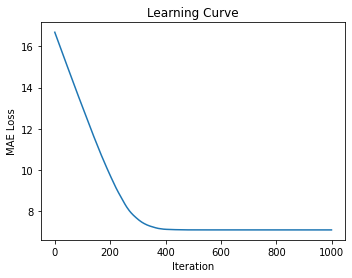

In [136]:
# Plotting the evolution of loss values
# Plot the learning curve
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(loss_values)
plt.title("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("MAE Loss")

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [137]:
y_pred_reg = model.predict(x)

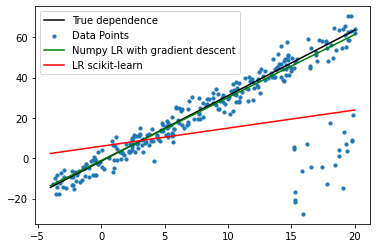

In [144]:
x_expanded = np.column_stack((x, np.ones(len(x))))
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data Points')
plt.plot(x, x_expanded @ w,c ='g', label='Numpy LR with gradient descent')
plt.plot(x, model.predict(x[:,None]),c= 'r', label='LR scikit-learn')
plt.legend();

As can be seen from the graph above, the use of gradient descent really improves the quality of model prediction. The model, which was built using numpy and gradient descent, predicts values much better than the scikit-learn model without optimization.

## Task 2 (2 + 1 points)

* Wrap your solution from the previous task into a class. Plot the learning curve and the final fit. Compare and comment your results with the previos ones. **(2 points)**

* Make it possible to choose a loss function. **(1 point)**

In [153]:
from sklearn.base import BaseEstimator, RegressorMixin

In [259]:
class LinearRergessionSGD(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.001, n_iters = 1000, loss='mae'):

        score = ["MSE", "MAE"]
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.loss = loss
        self.w_history = []


    def fit(self, x, y):

      n = len(x)
      self.n = n
    
      X_tmp = np.column_stack((x, np.ones(self.n)))
      w  = np.random.randn(len(X_tmp[0]))

      self.X = X_tmp
      self.y = y

      for i in range(self.n_iters):
         w -= self.learning_rate * self.calculate_gradient(w)
         self.update_loss(w)
      self.w = w
    
    def calculate_gradient(self, weight):
      score = ["MSE", "MAE"]
      if self.loss == "MSE":
        gradient = -2 * (self.X.T @(self.y - self.X @ weight ))/ self.X.shape[0]
      elif self.loss == 'MAE':
         g = np.sign(self.X @ weight - self.y)
         gradient = np.sum(self.X * g.reshape(self.n,1)/self.n , axis = 0)
      return gradient
    
    def update_loss(self, weight):
      if self.loss == "MSE":
        self.w_history.append(((self.X @ weight - self.y)**2).mean())
      elif self.loss == 'MAE':
        self.w_history.append(np.mean(np.abs(self.X @ weight - self.y)))
      
    def clear_loss(self):
      self.w_history.clear()


    def predict(self, x):
      print (x.shape)
      x_expanded = np.column_stack((x, np.ones(len(x))))
      print (x_expanded.shape)
      print (self.w.shape)
      return x_expanded @ self.w
    
    def fit_predict(self, x, y):
      self.fit(x,y)
      return self.predict(x)

In [263]:
model = LinearRergessionSGD(learning_rate = 0.001, n_iters = 1000 ,loss ="MAE")
model.fit(X,y)

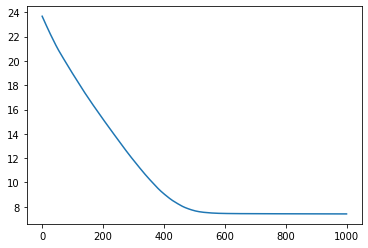

In [264]:
# Plotting the evolution of loss values
plt.plot(model.w_history);
plt.show()

(101,)
(101, 2)
(2,)


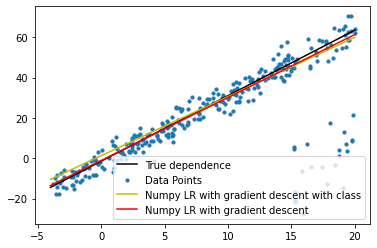

In [266]:
x_expanded = np.column_stack((x, np.ones(len(x))))
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data Points')
plt.plot(x, model.predict(x),c ='y', label='Numpy LR with gradient descent with class')
plt.plot(x, x_expanded @ w,c ='r', label='Numpy LR with gradient descent')
plt.legend();

As can be seen from the graph above, after using the classes and the model from the previous task, our predictions deviated more from the real values.